In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/two-sigma-connect-rental-listing-inquiries/test.json.zip
/kaggle/input/two-sigma-connect-rental-listing-inquiries/train.json.zip
/kaggle/input/two-sigma-connect-rental-listing-inquiries/images_sample.zip
/kaggle/input/two-sigma-connect-rental-listing-inquiries/sample_submission.csv.zip
/kaggle/input/two-sigma-connect-rental-listing-inquiries/Kaggle-renthop.torrent


## Kaggle Benefits
1. Get practical experience on the real-world data
2. Develop portfolio projects
3. Meet a great Data Science community
4. Try new domain or model type
5. Keep up-to-date with the best performing methods

In [ ]:
taxi_train = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv')
taxi_train.head()

In [ ]:
taxi_test = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')
taxi_test.columns.to_list()

In [ ]:
taxi_train.shape

# Chapter 1

### Public vs Private leaderboard shake-up
- Small shake-up
- Huge shake-up

```python
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 8,
          'silent': 1}

# Train xgboost model
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)
```

# Chapter 2

### Solution workflow
1. Understand the Problem and the metric
2. EDA
3. Local validation
4. Modeling

### Understand the problem
- Data type: tabular data, time series, images, text, etc.
- Problem type: classification, regression, ranking, etc.
- Evaluation metric: ROC AUC, F1-Score, MAE, MSE, etc.


### Metric definition
```python
from sklearn.metrics import mean_squared_error, f1_Score, roc_auc_score

# Define metric by yourself
def rmsle(y_true, y_pred):
    diffs = np.log(y_true + 1) - np.log(y_pred + 1)
    squares = np.power(diffs,2)
    err = np.sqrt(np.mean(squares))
    return err
```

### Initial EDA
- Size of the data --> consider a model to use.
- Properties of the target variable --> High class imbalanced or skewed distribution.
- Properties of the features --> finding some peculiarities and dependencies between features and target variable.
- Generate ideas for feature engineering.

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
prices = train.groupby('Survived', as_index = False)['Fare'].median()
test = pd.read_csv('/kaggle/input/titanic/test.csv')

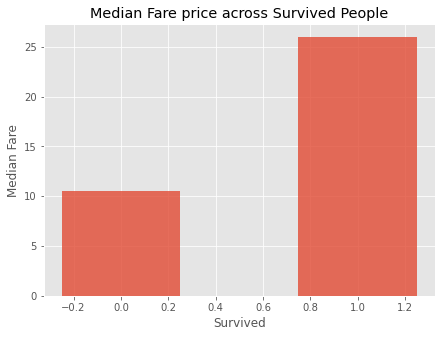

In [4]:
fig = plt.figure(figsize = (7,5))
plt.bar(prices.Survived, prices.Fare, width=0.5, alpha=0.8)

plt.xlabel('Survived')
plt.ylabel('Median Fare')
plt.title('Median Fare price across Survived People')

plt.show()

```python

# Calculate the ride distance
train['distance_km'] = haversine_distance(train)

# Draw a scatterplot
plt.scatter(x=train['fare_amount'], y=train['distance_km'], alpha=0.5)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')

# Limit on the distance
plt.ylim(0, 50) # Use to limit the value so we can avoid plotting outliers
plt.show()
```

### Local validation


```python

# Simple KFolds
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True, random_state =123)

for train_index, test_index in kf.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
# Stratified KFolds
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=123)

for train_index, test_index in skf.split(train, train['target']):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
```

### Data leakage
- Leakage causes a model to seem accurate until we start making predictions in a real-world environment.
- Leak in futures - using data that will not be available in the real setting.
- Leak in validation strategy - validation strategy differs from the real-world situation.

### Time K-fold cross-validation

```python
from sklearn.model_selection import TimeSeriesSplit

time_kfold = TimeSeriesSplit(n_splits=5)


# Sort train by date
train = train.sort_values('date')

for train_index, test_index in time_kfold.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
````

### Validation pipeline

```python
fold_metrics = []

for train_index, test_index in CV_STRATEGY.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
    model.fit(cv_train)
    predictions = model.predict(cv_test)
    metric = evaluate(cv_test, predictions)
    fold_metrics.append(metric)
    
    
mean_score = np.mean(fold_metrics)
```

The mean is not usually a good choice, because it does not take into account score deviation from one fold to another.


### Over validation score
```python
overall_score_minimizing = np.mean(fold_metrics) + np.std(fold_metrics) # If the metric competition is being minimized

overall_score_maximizing = np.mean(fold_metrics) - np.std(fold_metrics) # If the metric competition is being maximized

```
Be sure to add std to see the score, because if you just choose based on mean score choosing models will be biased ! 

```python

# Create TimeSeriesSplit object
time_kfold = TimeSeriesSplit(n_splits=3)

# Sort train data by date
train = train.sort_values('date')

# Iterate through each split
fold = 0
for train_index, test_index in time_kfold.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
    print('Fold :', fold)
    print('Train date range: from {} to {}'.format(cv_train.date.min(), cv_train.date.max()))
    print('Test date range: from {} to {}\n'.format(cv_test.date.min(), cv_test.date.max()))
    fold += 1
    
```

# Chapter 3

## Modeling stage
1. Preprocess data
2. Create new features
3. Improve models
4. Apply tricks
5. Repeat

Important rule is to tweak only a single thing at a time, because changing multiple things does not allow us to detect what actually works and what doesn't.

### Feature engineering
- Having look at the data, potentially generate ideas for new valuable features.
- Domain Knowledge allows to use ideas and approaches to work for particular domain.

### Feature types
1. Numerical
2. Categorical
3. Datetime
4. Coordinates
5. Text
6. Images

### Creating features
- When to create features independently?

```python
# Not Independently
data = pd.concat([train,test])
```
```python
# Create new features for the dataframe....
```

```python
# Get the train and test back
train = data[data.id.isin(train.id)]
test = data[data.id.isin(test.id)]```

### TimeSeries features

```python
# Convert date to the datetime object
dem['date'] = pd.to_datetime(dem['date'])

# Years features
dem['year'] = dem['date'].dt.year

# Month features
dem['month'] = dem['date'].dt.month

# Week features
dem['week'] = dem['date'].dt.weekofyear
```

```python
dem['dayofyear'] = dem['date'].dt.dayofyear
dem['dayofmonth'] dem['date'].dt.day
dem['dayofweek'] = dem['date'].dt.dayofweek
```

### Categorical Features
- Label encoding

```python
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['cat_encoded'] = le.fit_transform(df['cat'])
```
The problem with Label encoding is implicitly assume there is a ranking dependency between the categories. It is okay for tree based models, but not for linear model. You can use onehotencoding to overcome this problem

- One-Hot encoding

```python
ohe = pd.get_dummies(df['cat'], prefix='ohe_cat')
df.drop('cat',axis,inplace=True)

df = pd.concat([df,ohe], axis=1)```

### Other encoding approaches for categorical features
1. Backward difference coding
2. BaseN
3. Binary
4. CatBoost Encoder
5. Hashing
6. Helmert Coding
7. James-Stein Encoder
8. Leave One Out
9. M-estimate
10. One Hot
11. Ordinal
12. Polynomial Coding
13. Sum Coding
14. Target Encoder --> most use in kaggle competition
15. Weight of Evidence


## Target encoding

### High cardinality categorical features
These are categorical features that have a large number of category values (atleast 10).
- Use target encoding. Note: It introduces the correlation between the categories and the target variable.

### Mean target encoding
1. Calculate mean on the train, apply to the test.
2. Split train into K Folds. Calculate mean on(K-1) folds, apply to the K-th fold.
3. Add mean target encoded feature to model.


### Train encoding using out-of-fold
### Practical guides
- Smoothing --> If we had some rare categories with only one or two values, they would get a strict 0 or 1 mean encodings. 
$meanenc_i = \frac{targetsum_i}{n_i}$
- Smoothed -->
$ smoothedmeanenc_i = \frac{targetsum_i + \alpha * globalmean}{n_i + \alpha}$

- Alpha is hyperparameter range between [5,10] --> Regularization

- New categories
    - Fill new categories in the test data with a global_mean

In [13]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()

    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

In [8]:
def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values

In [9]:
def mean_target_encoding(train, test, target, categorical, alpha=5):
  
    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
  
    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature

In [16]:
from sklearn.model_selection import KFold

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [20]:
# Create 5-fold cross-validation
kf = KFold(n_splits=5, random_state=123, shuffle=True)

# For each folds split
for train_index, test_index in kf.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]

    # Create mean target encoded feature
    cv_train['Pclass_enc'], cv_test['Pclass_enc'] = mean_target_encoding(train=cv_train,
                                                                           test=cv_test,
                                                                           target='Survived',
                                                                           categorical='Pclass',
                                                                           alpha=5)
    # Look at the encoding
    print(cv_train[['Pclass', 'Survived', 'Pclass_enc']].sample(n=1))

     Pclass  Survived  Pclass_enc
576       2         1     0.46194
     Pclass  Survived  Pclass_enc
625       1         0     0.69304
     Pclass  Survived  Pclass_enc
491       3         0    0.257282
     Pclass  Survived  Pclass_enc
702       3         0    0.229713
     Pclass  Survived  Pclass_enc
221       2         0    0.436129


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 

Target encoding could be applied to any target variable type:

- For binary classification usually mean target encoding is used
- For regression mean could be changed to median, quartiles, etc.
- For multi-class classification with N classes we create N features with target mean for each category in one vs. all fashion


### Missing data
- XGBoost or LightGBM can treat mi issing data without any preprocessing.

### Numerical data
- Mean/median imputation
- Constant value imputation --> to emphasize there was missing value

### Categorical data
- Most frequent category imputation
- New category imputation

In [26]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Different types of imputers
mean_imputer = SimpleImputer(strategy='mean')
constant_imputer = SimpleImputer(strategy='constant', fill_value=-999)
frequent_imputer = SimpleImputer(strategy='most_frequent')
constan_imputer2 = SimpleImputer(strategy='constant', fill_value = 'MISS')
# Imputation
train[['Age']] = mean_imputer.fit_transform(train[['Age']])
train[['Cabin']] = frequent_imputer.fit_transform(train[['Cabin']])

# Chapter 4

## Baseline model
It is a very simple model that allows us to check the whole pipeline. Try to change something one by one to see if its get an improvement.

### Correlation with Public leaderboard
Observe correlation between local validation and Public Leaderboard scores. If it is not have linear relation then that must be something wrong, model or the validation scheme !

- Create a table that explain what you do to baseline model

In [31]:
rows = [['Simple mean', 9.986, 9.409, '1449/1500'], ['Group mean', 9.978, 9.407, '1411/1500'], ['Gradient Boosting', 5.996, 4.595, '1109/1500'],
       ['Add hour feature', 5.553, 4.352, '1068/1500']]
Baseline_History = pd.DataFrame(rows, columns = ['Model','Validation RMSE','Public LB RMSE','Public LB Position'])
Baseline_History

,Model,Validation RMSE,Public LB RMSE,Public LB Position
0,Simple mean,9.986,9.409,1449/1500
1,Group mean,9.978,9.407,1411/1500
2,Gradient Boosting,5.996,4.595,1109/1500
3,Add hour feature,5.553,4.352,1068/1500


Try to add new features, change the model, etc to improve our local validation and Public Leaderboard scores

### Hyperparameter tuning

In [33]:
rows = [['Classical Machine Learning', '+++', '+' ], ['Deep Learning','-','+++']]
tipe = pd.DataFrame(rows, columns = ['Competition type','Feature engineering','Hyperparameter Optimization'])
tipe

,Competition type,Feature engineering,Hyperparameter Optimization
0,Classical Machine Learning,+++,+
1,Deep Learning,-,+++


- After we run out of ideas to do feature engineering, we can move to the optimization.
- But in deep learning competitions with text or images data, there is no need to feature engineering. Neural nets are generating features on their own.

### Hyperparameter optimization strategies
- GridSearch. Choose the predefined grid of hyperparameter values
- RandomSearch. Choose the search space of hyperparameter values. For example 'from' and 'to' values.
- Bayesian optimization. Choose the search space of hyperparameter values. Uses past evaluation results to choose the next hyperparameter values to evaluate.

### Grid search

```python
# Possible alpha values
alpha_grid = [0.01, 0.1,1,10]

from sklearn.linear_model import Ridge
results = {}
# For each value in the grid
for candidate_alpha in alpha_grid:
    # Create a model with specific alpha value
    ridge_regression = Ridge(alpha=candidate_alpha)
    
    # Find the validation score for this model
    ....
    
    # Save the results for each alpha value
    results[candidate_alpha] = validation_score
    ```

```python

import itertools

# Hyperparameter grids
max_depth_grid = [3, 5, 7]
subsample_grid = [0.8, 0.9, 1.0]
results = {}

# For each couple in the grid
for max_depth_candidate, subsample_candidate in itertools.product(max_depth_grid, subsample_grid):
    params = {'max_depth': max_depth_candidate,
              'subsample': subsample_candidate}
    validation_score = get_cv_score(train, params)
    # Save the results for each couple
    results[(max_depth_candidate, subsample_candidate)] = validation_score   
print(results)

```
itertools.product(x1,x2) --> print the combination of x1 and x2

## Model ensembling

### Model blending
1. Regression problem
2. Train two different models: A and B
3. Make predictions on the test data --> then find the mean of those predictions.
    - Arithmetic mean or Geometric mean (Good for classification)
    
    
### Model stacking
1. Split train data into two parts
2. Train multiple models on Part 1
3. Make predictions on Part 2
4. Make predictions on the test data
5. Train a new model on Part 2 using predictions as features --> Meta model or 2nd level model
6. Make predictions on the test data using the 2nd level model --> Stacking output



Usually the 2nd level model is some simple model like Linear or Logistic Regressions.

## Tips
### Save information
1. Save folds to the disk
2. Save model runs
3. Save model predictions to the disk
4. Save performance results --> Notes or comment

### Forum and kernels usage

1. When
    - Before the competition:
        - Read winner's solution from the past similar competitions
        - Go through baseline approaches from the past similar competitions
    - During the competition:
        - Follow the discussion to find the ideas and approaches for the problem
        - Look at EDA, baseline models and validation strategies used by others
    - After the competition:
        - Read winner's solutions
        - Look at the final solutions code sharing

## Final Submissions
1. Best submission on the local validation
2. Best submission on the Public Leaderboard

# Kaggle vs Data Science
Data Analytics
- Kaggle does not help here

Machine learning models
1. Talk to Business. Define the problem
2. Collect the data
3. Select the metric
4. Make train and test split
5. Create the model
6. Move model to the production